### Exercícios de revisão - Megadados

Um dos setores de tecnologia em franca expansão é o agrotech. Avanços em telecomunicações, computação e sistemas de informação viabilizam a aplicação de tecnologia da informação para o aumento da produtividade no campo.

Você foi contratado por uma empresa de automação agrícola. Sua tarefa é implementar um sistema para ajudar na aplicação de inseticidas no campo. Em conversas com o cliente, você levantou as seguintes informações sobre o
domínio de negócios:

- Uma fazenda tem vários lotes. É importante dividir a fazenda em lotes
para implementar a rotação das plantações: em um ano planta-se milho
em um lote, noutro ano planta-se soja, etc.

- Cada lote tem apenas um tipo de plantação por vez (ou seja, não tem lote
hibrido milho-soja)

- Um inseticida pode servir para vários tipos de plantação, mas não para
todos. De modo similar, uma plantação pode receber diferentes
inseticidas, mas provavelmente não todos.

- Para cada combinação de tipos de plantação e inseticida existe uma
frequência mensal de aplicação.

- Cada inseticida tem um certo custo por hectare para ser aplicado.

- Cada lote vai receber um inseticida específico, determinado pelo
engenheiro agrícola.


### Questão 1:

Liste as entidades deste problema e seus atributos, usando a
notação de schema do modelo relacional.

A chave estrangeiro vai sempre no muitos. Por exemplo, uma fazenda tem muitos lotes - logo lotes vai ter a chave estrangeira da fazenda. Uma plantação pode estar relacionada a muitos lotes - logo lotes tem chave estrangeira da plantação. Um inseticida pode estar relacionado a diferentes lotes - logo lote vai ter inseticida.  

fazenda(<ins>id_fazenda</ins>, nome)

lote(<ins> id_lote </ins>, id_fazenda, id_plantacao, id_inseticida, area)
    
plantacao (<ins> id_plantacao </ins>, nome)
    
plantacao_inseticida (<ins> id_plantacao</ins>, <ins>id_inseticida</ins>, frequencia)   

inseticida (<ins> id_inseticida </ins>, nome, custo_ha)

Nessa questão em específico considere o seguinte: a tabela de plantaçao inseticida apenas relaciona quais inseticidas podem ser usados em quais plantações. Mas o inseticida que vai ser usado mesmo naquele lote é determinado pelo engenheiro agrícola. por isso que um inseticida pode estar relacionado à vários lotes diferentes, mas um lote só pode ter apenas um inseticida.

Além disso: um lote obrigatoriamente está relacionado à uma fazenda, mas não necessariamente possui uma plantação ou inseticida.


### Questão 2: 

Desenhe o diagrama do modelo relacional deste problema. Não
esqueça de indicar claramente as chaves primárias, chaves estrangeiras, e a
cardinalidade dos relacionamentos.

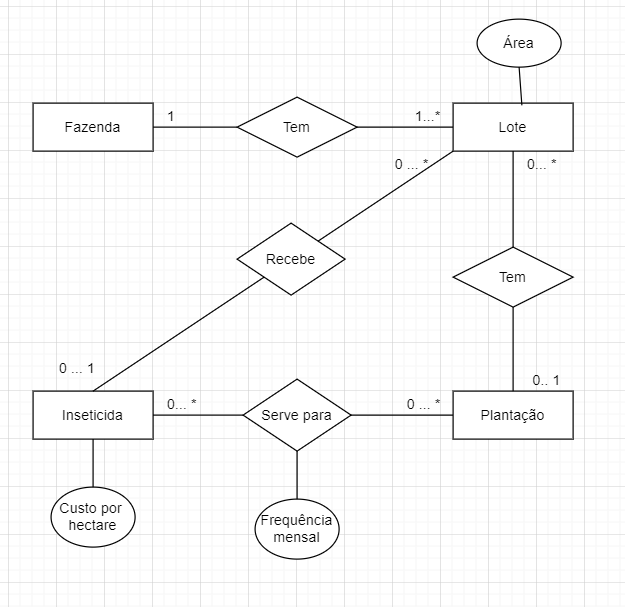

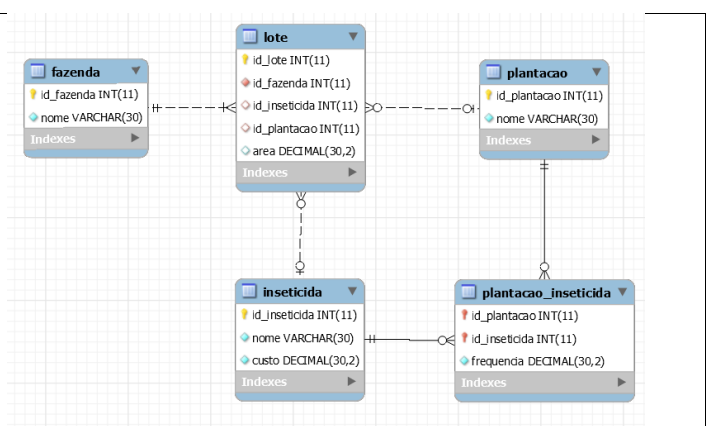

### Questão 3:

Escreva o script de criação da tabela referentes aos lotes

In [ ]:
'''
USE agro;

DROP TABLE IF EXISTS lote;

CREATE TABLE lote(
    id_lote INT,
    id_fazenda INT NOT NULL,
    id_plantacao INT,
    id_inseticida INT,
    area FLOAT NOT NULL,
    PRIMARY KEY (id_lote)
);

ALTER TABLE
    ADD CONSTRAINT fk_fazenda
        FOREIGN KEY id_fazenda
            REFERENCES fazenda(id_fazenda)

ALTER TABLE
    ADD CONSTRAINT fk_plantacao
        FOREIGN KEY id_plantacao
            REFERENCES plantacao(id_plantacao)

ALTER TABLE
    ADD CONSTRAINT fk_inseticida
        FOREIGN KEY id_inseticida
            REFERENCES inseticida(id_inseticida)
            
'''

Antes, vamos explorar os DADOS:

In [4]:
import mysql.connector
from functools import partial


def get_connection_helper():

    def run_db_query(connection, query, args=None):
        with connection.cursor() as cursor:
            print('Executando query:')
            cursor.execute(query, args)
            for result in cursor:
                print(result)

    connection = mysql.connector.connect(
        host='localhost',
        user='megadados',
        password='megadados',
        database='agro',
    )
    return connection, partial(run_db_query, connection)


connection, db = get_connection_helper()

In [3]:
db('SELECT * FROM fazenda')

Executando query:
(1, 'Terra Forte')
(2, 'Agua Brava')


In [5]:
db('SELECT * FROM plantacao')

Executando query:
(1, 'milho')
(2, 'soja')
(3, 'cafe')
(4, 'algodao')


In [6]:
db('SELECT * FROM inseticida')

Executando query:
(1, 'Mata-Tudo', Decimal('200.00'))
(2, 'Mae-Terra', Decimal('500.00'))
(3, 'Carinho', Decimal('700.00'))


In [7]:
db('SELECT * FROM lote')

Executando query:
(1, 1, 2, 3, 100.0)
(2, 1, 1, 2, 70.0)
(3, 1, None, None, 80.0)
(4, 2, 4, None, 90.0)
(5, 2, 3, 3, 50.0)
(6, 2, 2, 2, 30.0)
(7, 2, 4, None, 110.0)


In [8]:
db('SELECT * FROM plantacao_inseticida')

Executando query:
(1, 1, 2)
(1, 2, 1)
(2, 2, 1)
(2, 3, 1)
(3, 1, 4)
(3, 3, 1)


### Questão 4: Escreva a DML para as seguintes tarefas:

a) Crie 3 lotes para a fazenda: um de 4 hectares, outro de 3 hectares, e outro
de 5 hectares

In [9]:
db('''
INSERT INTO lote (id_lote, id_fazenda, id_plantacao, id_inseticida, area) VALUES (8, 1, 1, 1, 4), (9, 2, 2, 2, 4), (10, 1, 3, 3, 5)

''')

Executando query:


In [10]:
db('SELECT * FROM lote')

Executando query:
(1, 1, 2, 3, 100.0)
(2, 1, 1, 2, 70.0)
(3, 1, None, None, 80.0)
(4, 2, 4, None, 90.0)
(5, 2, 3, 3, 50.0)
(6, 2, 2, 2, 30.0)
(7, 2, 4, None, 110.0)
(8, 1, 1, 1, 4.0)
(9, 2, 2, 2, 4.0)
(10, 1, 3, 3, 5.0)


b) Corrija um erro no item anterior: mude o tamanho do lote de 3 hectares
para 3,5 hectares.


In [11]:
db(''' UPDATE lote SET area = 3.5 WHERE id_lote = 8''')

Executando query:


In [12]:
db('SELECT * FROM lote')

Executando query:
(1, 1, 2, 3, 100.0)
(2, 1, 1, 2, 70.0)
(3, 1, None, None, 80.0)
(4, 2, 4, None, 90.0)
(5, 2, 3, 3, 50.0)
(6, 2, 2, 2, 30.0)
(7, 2, 4, None, 110.0)
(8, 1, 1, 1, 3.5)
(9, 2, 2, 2, 4.0)
(10, 1, 3, 3, 5.0)


In [13]:
connection.rollback()

In [14]:
db('SELECT * FROM lote')

Executando query:
(1, 1, 2, 3, 100.0)
(2, 1, 1, 2, 70.0)
(3, 1, None, None, 80.0)
(4, 2, 4, None, 90.0)
(5, 2, 3, 3, 50.0)
(6, 2, 2, 2, 30.0)
(7, 2, 4, None, 110.0)


c) Como obter o id do lote em uma aplicação real? É realista pedir ao usuário
que decore o id de cada lote?

Não, não é ideal pedir para o usuário decorar o id de cada lote. O que pode ser feito é criar tabelas e utilizar ferramentas como o SELECT para obter as informações desejadas. Ou seja, a aplicação deve ter uma interface de usuário que permita seleção do lote de interesse de modo simples.


### Questão 5: Escreva queries para as seguintes tarefas:


a) Qual a maior fazenda?


In [18]:
db('''
SELECT
    id_fazenda, nome, SUM(area) as area_tot
FROM
    fazenda
    INNER JOIN lote USING (id_fazenda)
GROUP BY
    id_fazenda
ORDER BY
    area_tot DESC
LIMIT 
    1
''')

Executando query:
(2, 'Agua Brava', 280.0)


b) Quais as plantações com área total maior que 10 hectares?

In [20]:
db('''
SELECT
    id_plantacao, nome, SUM(area) as area_tot
FROM
    lote
    INNER JOIN plantacao USING (id_plantacao)
GROUP BY
    id_plantacao
HAVING
    area_tot > 10
ORDER BY
    area_tot DESC
''')

Executando query:
(4, 'algodao', 200.0)
(2, 'soja', 130.0)
(1, 'milho', 70.0)
(3, 'cafe', 50.0)


c) Qual o custo total atual com inseticidas? (Anual)

In [23]:
db('''
SELECT
    SUM(area*preco*frequencia*12) as custo_tot
FROM
    lote
    INNER JOIN inseticida USING (id_inseticida)
    INNER JOIN plantacao_inseticida USING (id_inseticida)
WHERE
    lote.id_plantacao = plantacao_inseticida.id_plantacao
''')

Executando query:
(1860000.0,)


In [25]:
db('''
SELECT
    SUM(area*preco*frequencia*12) as custo_tot
FROM
    lote
    INNER JOIN inseticida USING (id_inseticida)
    INNER JOIN plantacao_inseticida USING (id_inseticida, id_plantacao)

''')

Executando query:
(1860000.0,)


d) Quais inseticidas não foram usados?

In [30]:
db('''
INSERT INTO inseticida (id_inseticida, nome, preco) VALUES
(4, "AgroTop", 600),
(5, "Mata-Pouco", 100)
''')

Executando query:


In [31]:
db('''
SELECT 
    nome, id_lote
FROM
    inseticida
    LEFT OUTER JOIN lote USING (id_inseticida)
WHERE
    id_lote IS NULL
''')

Executando query:
('Mata-Tudo', None)
('AgroTop', None)
('Mata-Pouco', None)


e) Qual o menor custo possível com inseticidas?

In [12]:
# Calcular o custo dos inseticidas: custo*frequencia NAQUELA PLANTACAO

db('DROP TABLE IF EXISTS temp_inseticidaCusto')

db('''
CREATE TEMPORARY TABLE temp_inseticidaCusto
    SELECT
        id_plantacao, MIN(preco*frequencia) as custo_inseticida
    FROM
        inseticida
        INNER JOIN plantacao_inseticida USING (id_inseticida) 
    GROUP BY
        id_plantacao
''')

db('SELECT * FROM temp_inseticidaCusto')

Executando query:
Executando query:
Executando query:
(1, Decimal('400.00'))
(2, Decimal('500.00'))
(3, Decimal('700.00'))


In [21]:
db('''
SELECT
    SUM(area*custo_inseticida*12)
FROM
    temp_inseticidaCusto
    INNER JOIN lote USING (id_plantacao)
GROUP BY
    id_fazenda

''')

Executando query:
(936000.0,)
(600000.0,)


In [41]:
# menor custo por plantação : custo do inseticida e a frequência naquela plantacao
db('DROP TEMPORARY TABLE IF EXISTS custo_plantacao')

db('''
CREATE TEMPORARY TABLE custo_plantacao
    SELECT
        id_plantacao, inseticida.nome, MIN(preco*frequencia) as custo_inicial
    FROM
        inseticida
        INNER JOIN plantacao_inseticida USING (id_inseticida)
    GROUP BY
        id_plantacao
''')

db('SELECT * FROM custo_plantacao')

Executando query:
Executando query:
Executando query:
(1, 'Mata-Tudo', Decimal('400.00'))
(2, 'Mae-Terra', Decimal('500.00'))
(3, 'Mata-Tudo', Decimal('700.00'))


In [47]:
db('''
SELECT
    SUM(area*custo_inicial*12) as preco_tot
FROM
    custo_plantacao
    INNER JOIN lote USING (id_plantacao)
WHERE
    lote.id_inseticida IS NOT NULL
''')

Executando query:
(1536000.0,)


In [22]:
connection.close()